# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis 
# H_0 : 4 < new_response_rate < 6% for the new template

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
# H_1 : response_rate >= 6% or <= 4% for the new template

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [1]:
from statsmodels.stats.power import TTestIndPower, TTestPower

# Calculate the required sample size
pop_std = .0475
cohens_d = .01 / pop_std

ttest_power = TTestIndPower()

In [8]:
ttest_power.solve_power(effect_size = cohens_d, alpha = 0.05, power = .80)

355.14275443426794

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

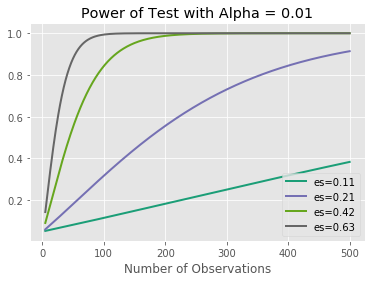

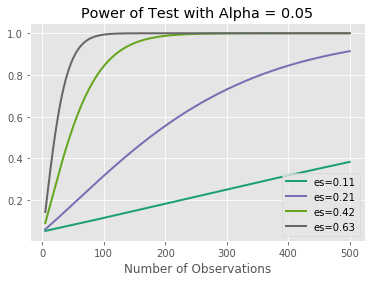

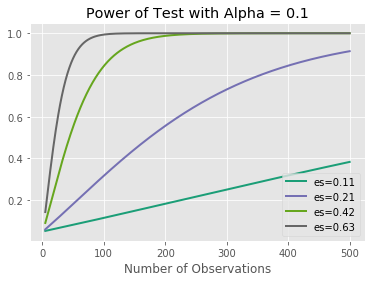

In [7]:
differences = [.005, .01, .02, .03]
alphas = [.01, .05, .1]
effect_sizes = [difference/pop_std for difference in differences]
sample_sizes = range(1,301)

df_list = []
for alpha in alphas:
    ttest_power.plot_power(dep_var = 'nobs',
                           nobs = np.array(range(5,501)),
                           effect_size = np.array(effect_sizes),
                           alpha = .05)
    plt.title('Power of Test with Alpha = {}'.format(alpha))

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
# We wish to test whether the new email template will provide a 1% increase in response rate 
# from the current 5%. In order to test for this improvement with 95% confidence that the
# increase is due to the new email design, we will need to send the email to a minimum of 356 
# customers. Because we don't know whether the new template will have a positive or negative 
# effect, we want to use the minimum number necessary to give our test ample statistical power, 
# but minimize any negative effect that could possibly arise from the change. On the plus side, 
# the test would also detect a negative 1% move due to the template change, so it may provide us 
# with useful information even in the worst case scenario about what does not work.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.